## YOLO11 Î™®Îç∏ ÌååÏù∏ÌäúÎãù Í≥ºÏ†ï  
1) v1. ÎûúÎç§ Í∞ÄÏ§ëÏπò ÌïôÏäµ  
2) v2. Ï∂îÍ∞Ä ÌïôÏäµ  
3) v3. COCO Í∞ÄÏ§ëÏπò(ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Îç∞Ïù¥ÌÑ∞ÏÖã)ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµ  
4) v4. Î∞±Î≥∏ ÎèôÍ≤∞ ÌõÑ ÌååÏù∏ÌäúÎãù  

---  

- **ÌïôÏäµ Í≤∞Í≥º ÎπÑÍµê**  

| Model       | Precision (P) | Recall (R) | mAP@50 | mAP@50-95 | Inference Speed (it/s) |
|-------------|---------------|------------|--------|-----------|-------------------------|
| YOLO11s_v1  | 0.661         | 0.623      | 0.684  | 0.418     | 13.95                  |
| YOLO11s_v2  | 0.657         | 0.653      | 0.701  | 0.424     | 3.42                   |
| YOLO11s_v3  | 0.688         | 0.660      | 0.711  | 0.436     | 3.54                   |
| **YOLO11s_v4**  | **0.729**     | **0.630**  | **0.706**| **0.442** | **4.44**               |  

---  

- **ÏÑ†ÌÉù Î™®Îç∏ Î≤ÑÏ†Ñ: v4. Î∞±Î≥∏ ÎèôÍ≤∞ ÌõÑ ÌååÏù∏ÌäúÎãù Î≤ÑÏ†Ñ**
  - PrecisionÍ≥º mAP@50-95Í∞Ä Í∞ÄÏû• ÎÜíÏïÑ, Îã§ÏñëÌïú Í∞ùÏ≤¥ ÌÅ¨Í∏∞ÏóêÏÑúÎèÑ Ï†ïÌôïÌïú ÏòàÏ∏° Í∞ÄÎä•ÌïòÎã§Í≥† ÌåêÎã®Ìï®  

---  
- **ÏÇ¨Ïö© Îç∞Ïù¥ÌÑ∞ÏÖã**  
  - Roboflow Í≥µÍ∞ú Îç∞Ïù¥ÌÑ∞ÏÖã: Billboard Dataset
  - Ï¥ù Ïù¥ÎØ∏ÏßÄ: 3,399Ïû• (Train: 2,719 / Valid: 510 / Test: 170)

In [ ]:
!pip install ultralytics
!pip install roboflow

In [ ]:
# ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Îã§Ïö¥Î°úÎìú
!gdown 1JZA7_aM-k5-0N0kvvFLPcRI3RvRXo9zN  # test02.jpg
!gdown 1VaDFbs3YPmwO5foQHbM4a32QMGDOYAZm  # test03.jpg
!gdown 1uHkOEIMeeopf3AfhoCPfriXhLKkPNJBM # test04
!gdown 1JLNgO8GYuTZoAyJFHprDd1JZqC25Sq8M # test05
!gdown 1LTBmPwSoy6FVjhAS8ILFvaC7zUC4dFaI # test06

In [ ]:
import os
import cv2
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from roboflow import Roboflow

In [ ]:
# Roboflow Ïó∞Í≤∞
rf = Roboflow(api_key="api_key")  # Î≥∏Ïù∏Ïùò API ÌÇ§ ÏûÖÎ†•

project = rf.workspace("arslan-ongr8").project("billboard-xlvz1")
version = project.version(1)
dataset = version.download("yolov11")

print(f"Data YAML Path: {dataset.location}/data.yaml")

### v1. ÎûúÎç§ Í∞ÄÏ§ëÏπò ÌïôÏäµ   

In [ ]:
# Load a model
model = YOLO("yolo11s.pt")

# Train the model
train_results = model.train(
    data="/content/Billboard-1/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    batch=8,
    workers=4,
    mosaic=0.0,
    name="billboard_detect",  # ÌïôÏäµ Í≤∞Í≥º Ìè¥ÎçîÎ™Ö
    pretrained=False,
    amp=False,
    device="cuda",
)

# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model("/content/test02.jpg")
results[0].show()

### v2. Ï∂îÍ∞ÄÌïôÏäµ  

In [ ]:
# Í∏∞Ï°¥ ÌïôÏäµÎêú Î™®Îç∏(last.pt)
model = YOLO("/content/runs/detect/billboard_detect3/weights/last.pt")

# Í∏∞Ï°¥ ÌïôÏäµÎêú Î™®Îç∏ÏóêÏÑú Ï∂îÍ∞Ä ÌïôÏäµ ÏßÑÌñâ
train_results = model.train(
    data="/content/Billboard-1/data.yaml",
    epochs=20,   # Í∏∞Ï°¥ ÌïôÏäµ(20) + Ï∂îÍ∞Ä ÌïôÏäµ(20) -> Ï¥ù 40 epoch
    imgsz=960,   # ÏûëÏùÄ Í∞ùÏ≤¥ ÌÉêÏßÄÎ•º ÏúÑÌï¥ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä
    batch=16,    # Î∞∞Ïπò ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä
    mosaic=0.5,  # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌôúÏÑ±Ìôî
    name="billboard_detect_v2",  # ÏÉà Ìè¥ÎçîÏóê Ï†ÄÏû• (Ïù¥Ï†ÑÍ≥º Íµ¨Î∂Ñ)
    pretrained=False,            # last.ptÎ•º ÏÇ¨Ïö©ÌïòÎØÄÎ°ú False (Ïù¥Ïñ¥ ÌïôÏäµ)
    amp=True,
    device="cuda",
)

# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model("/content/test02.jpg")
results[0].show()

# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model

### v3. COCO Í∞ÄÏ§ëÏπòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌïôÏäµ  

In [ ]:
# YOLOv11 Î™®Îç∏ Î°úÎìú
model = YOLO("yolo11s.pt")

train_results = model.train(
    data="/content/Billboard-1/data.yaml",
    epochs=50,
    imgsz=960,   # Ìï¥ÏÉÅÎèÑ Ï¶ùÍ∞ÄÌïòÏó¨ ÏûëÏùÄ Í¥ëÍ≥†ÎèÑ ÌÉêÏßÄ Í∞ÄÎä•ÌïòÍ≤å Ï°∞Ï†ï
    batch=16,    # Î∞∞Ïπò ÌÅ¨Í∏∞ Ï¶ùÍ∞Ä
    workers=4,   # Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏµúÏ†ÅÌôî
    mosaic=0.5,  # Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï ÌôúÏÑ±Ìôî
    name="billboard_detect",
    pretrained=True,  # COCO Í∞ÄÏ§ëÏπò ÌôúÏö©ÌïòÏó¨ Îπ†Î•∏ ÏàòÎ†¥ Ïú†ÎèÑ
    amp=True,    # ÏûêÎèô ÌòºÌï© Ï†ïÎ∞ÄÎèÑ ÌôúÏÑ±Ìôî (ÌïôÏäµ ÏÜçÎèÑ Ìñ•ÏÉÅ)
    device="cuda",
)

# Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏÖã ÏÑ±Îä• ÌèâÍ∞Ä
metrics = model.val()

# ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌï¥ YOLOv11 Í∞ùÏ≤¥ ÌÉêÏßÄ ÏàòÌñâ
test_image = "/content/test02.jpg"
results = model(test_image)

# Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ Ï∂îÏ∂ú
boxes = results[0].boxes.xyxy.cpu().numpy()        # (x1, y1, x2, y2)
confidences = results[0].boxes.conf.cpu().numpy()  # Ïã†Î¢∞ÎèÑ

results[0].show()

### v4. Î∞±Î≥∏ ÎèôÍ≤∞ ÌõÑ ÌååÏù∏ÌäúÎãù  

In [ ]:
# Load a model
model = YOLO("yolo11s.pt")

print(model.model) # yolo11 Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏

In [ ]:
model = YOLO("yolo11s.pt")

# Backbone Ï∞æÍ∏∞ -> Ï¥àÎ∞ò Î†àÏù¥Ïñ¥ (Conv, C3) ÎèôÍ≤∞
for layer in list(model.model.children())[:9]:  # Ïïû 9Í∞ú Î†àÏù¥Ïñ¥ ÎèôÍ≤∞
    for param in layer.parameters():
        param.requires_grad = False

results = model.train(
    data="/content/Billboard-1/data.yaml",
    epochs=20,  # YOLO Ìó§ÎìúÎßå ÌïôÏäµ
    imgsz=640,
    batch=16,
    freeze=9    # Î∞±Î≥∏ 0~8Î≤à Î†àÏù¥Ïñ¥ ÎèôÍ≤∞
)

In [ ]:
# 1Îã®Í≥Ñ ÌïôÏäµÌïú best.pt Î™®Îç∏ Î°úÎìú
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Backbone Í∞ÄÏ§ëÏπò Ìï¥Ï†ú
for layer in list(model.model.children())[:9]:
    for param in layer.parameters():
        param.requires_grad = True

# Fine-Tuning-Î∞±Î≥∏ Ìè¨Ìï® Ï†ÑÏ≤¥ ÌïôÏäµ
results = model.train(
    data="/content/Billboard-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    lr0=0.0001,
    patience=10,
    seed=1234  # Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌï¥ seed ÏÑ§Ï†ï
)

In [ ]:
# ÏÑ±Îä•ÌèâÍ∞Ä
model = YOLO("runs/detect/train3/weights/best.pt")
metrics = model.val()

Ultralytics 8.3.80 üöÄ Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


val: Scanning /content/Billboard-1/valid/labels.cache... 510 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 510/510 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 32/32 [00:07<00:00,  4.44it/s]


                   all        510       1404      0.729       0.63      0.706      0.442
Speed: 0.6ms preprocess, 9.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val



image 1/1 /content/test06.jpg: 448x640 7 billboards, 52.0ms
Speed: 2.3ms preprocess, 52.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


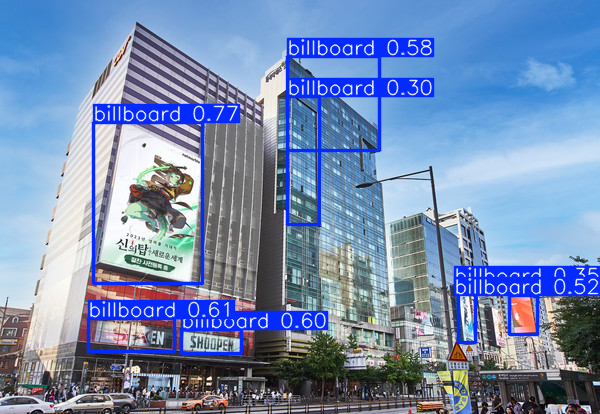

In [ ]:
# ÌÖåÏä§Ìä∏
results = model("/content/test06.jpg")
results[0].show()

#### Î™®Îç∏ Ï†ÄÏû•
- Ïã†Î¢∞ÎèÑÍ∞Ä ÎÜíÏùÄ Í∞ùÏ≤¥Îßå ÌëúÏãú  


image 1/1 /content/test06.jpg: 448x640 7 billboards, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


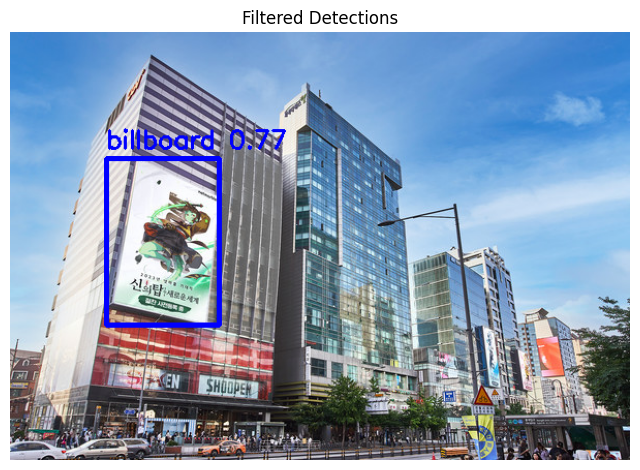

In [ ]:
model = YOLO("/content/best-0228.pt")

image_path = "/content/test06.jpg"

# Í∞ùÏ≤¥ ÌÉêÏßÄ ÏàòÌñâ Ïã†Î¢∞ÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í∞ùÏ≤¥ ÏÑ†ÌÉù
results = model(image_path)
detections = results[0]

if len(detections.boxes) > 0:
    best_box = max(detections.boxes, key=lambda box: box.conf.item())

    # Bounding Box Ï¢åÌëú Î∞è ÌÅ¥ÎûòÏä§ Ï†ïÎ≥¥
    x1, y1, x2, y2 = map(int, best_box.xyxy[0].tolist())
    conf = best_box.conf.item()
    class_id = int(best_box.cls.item())
    class_name = results[0].names[class_id]

    # Í∞ÄÏû• ÌÅ∞ Í∞ùÏ≤¥ Bounding Box ÌëúÏãú
    img = cv2.imread(image_path)
    color = (255, 0, 0)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
    label = f"{class_name} {conf:.2f}"
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Detections")
plt.axis("off")
plt.show()

In [ ]:
# yolo11s best model download
!gdown 1A6_iThtWBlzgvGqOP9QXuDYGFL809jYL


image 1/1 /content/test02.jpg: 352x640 9 billboards, 53.4ms
Speed: 6.8ms preprocess, 53.4ms inference, 354.9ms postprocess per image at shape (1, 3, 352, 640)


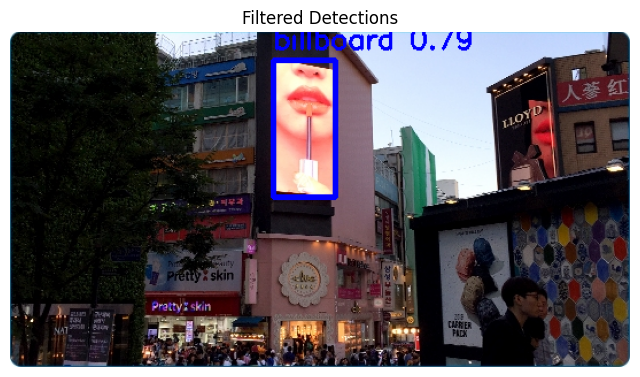

In [ ]:
# Í∏∞Ï°¥ ÌïôÏäµÎêú Î™®Îç∏ Î°úÎìú
model = YOLO("/content/best-0228.pt")

# ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
image_path = "/content/test02.jpg"

results = model(image_path) # Í∞ùÏ≤¥ ÌÉêÏßÄ ÏàòÌñâ
detections = results[0]     # Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Í≤∞Í≥º

# Ïã†Î¢∞ÎèÑÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í∞ùÏ≤¥ Ï∞æÍ∏∞
if len(detections.boxes) > 0:
    # Ïã†Î¢∞ÎèÑ(Confidence score)Í∞Ä Í∞ÄÏû• ÎÜíÏùÄ Í∞ùÏ≤¥ Ï∞æÍ∏∞
    best_box = max(detections.boxes, key=lambda box: box.conf.item())

    # Bounding Box Ï¢åÌëú Î∞è ÌÅ¥ÎûòÏä§ Ï†ïÎ≥¥ Í∞ÄÏ†∏Ïò§Í∏∞
    x1, y1, x2, y2 = map(int, best_box.xyxy[0].tolist())  # Í≤ΩÍ≥Ñ ÏÉÅÏûê Ï¢åÌëú
    conf = best_box.conf.item()  # Ïã†Î¢∞ÎèÑ
    class_id = int(best_box.cls.item())
    class_name = results[0].names[class_id]

    img = cv2.imread(image_path)

    # Í≤ΩÍ≥Ñ ÏÉÅÏûê Í∑∏Î¶¨Í∏∞
    color = (255, 0, 0)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)

    # ÌÖçÏä§Ìä∏ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
    label = f"{class_name} {conf:.2f}"
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Filtered Detections")
plt.axis("off")
plt.show()